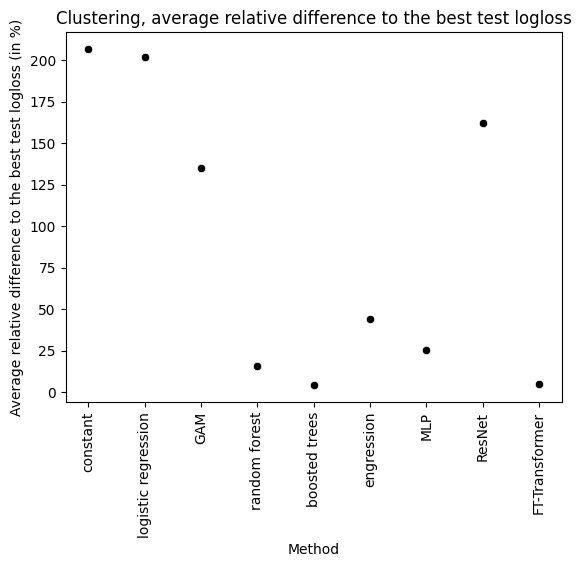

In [25]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

directory = r'RESULTS2/CLUSTERING'
df = pd.DataFrame()

for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        task_name = filename.split('_clustering_RMSE')[0]
        filepath = os.path.join(directory, filename)
        table = pd.read_csv(filepath)
        logloss = table['Log Loss']
        lowest_logloss = table['Log Loss'].min()
        df[task_name] = (logloss - lowest_logloss) / lowest_logloss

df.index=table['Method']
df.index.name = 'Method'
mean = df.mean(axis=1)
median = df.median(axis=1)
std = df.std(axis=1)
result_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Standard Deviation': std})
result_df.index.name = 'Method'
result_df.reset_index(inplace=True)

# Reorder the methods
method_order = ['constant', 'logistic_regression', 'GAM', 'rf', 'boosted_trees', 'engression', 'MLP', 'ResNet', 'FTTrans']
result_df['Method'] = pd.Categorical(result_df['Method'], categories=method_order, ordered=True)

# Sort the dataframe by the reordered method column
result_df.sort_values('Method', inplace=True)

result_df['Method'] = result_df['Method'].replace({'rf': 'random forest', 'boosted_trees': 'boosted trees', 'logistic_regression': 'logistic regression', 'FTTrans': 'FT-Transformer'})
result_df['Mean'] = 100*result_df['Mean']

# Plot the scatterplot
sns.scatterplot(data=result_df, x='Method', y='Mean', color='black')

# Removing the ylabel
plt.ylabel('Average relative difference to the best test logloss (in %)')

# Adding labels and title
plt.xlabel('Method')
plt.title('Clustering, average relative difference to the best test logloss')

# Rotating x-axis labels vertically
plt.xticks(rotation='vertical')

# Save the plot
os.makedirs('PICTURES', exist_ok=True)
plt.savefig('PICTURES/clustering_logloss_only_num_features_relative_differences.png')

plt.show()

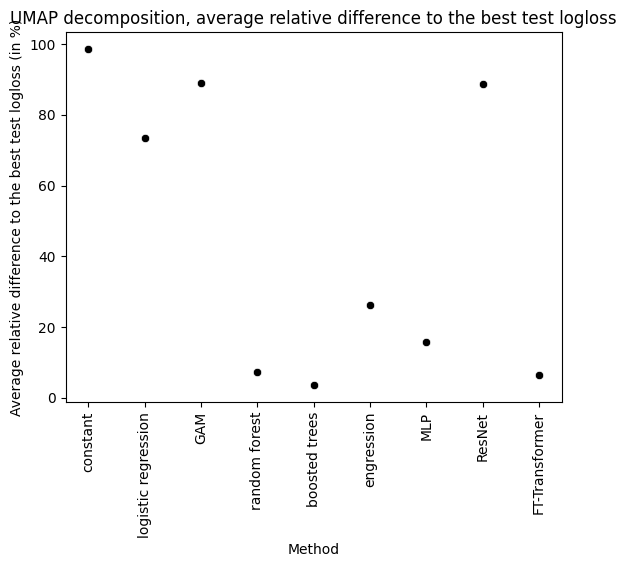

In [26]:
import os
import pandas as pd

directory = r'RESULTS2/UMAP_DECOMPOSITION'
df = pd.DataFrame()

for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        task_name = filename.split('_umap_decomposition_RMSE')[0]
        filepath = os.path.join(directory, filename)
        table = pd.read_csv(filepath)
        if filename=='361055_umap_decomposition_logloss_results.csv':
            # Add a row with Method='GAM' and logloss=NaN
            table.loc[len(table.index)]=['GAM', float('NaN')]        
        logloss = table['Log Loss']
        lowest_logloss = table['Log Loss'].min()
        df[task_name] = (logloss - lowest_logloss) / lowest_logloss


df.index=table['Method']
df.index.name = 'Method'
mean = df.mean(axis=1)
median = df.median(axis=1)
std = df.std(axis=1)
result_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Standard Deviation': std})
result_df.index.name = 'Method'
result_df.reset_index(inplace=True)

# Reorder the methods
method_order = ['constant', 'logistic_regression', 'GAM', 'rf', 'boosted_trees', 'engression', 'MLP', 'ResNet', 'FTTrans']
result_df['Method'] = pd.Categorical(result_df['Method'], categories=method_order, ordered=True)

# Sort the dataframe by the reordered method column
result_df.sort_values('Method', inplace=True)

result_df['Method'] = result_df['Method'].replace({'rf': 'random forest', 'boosted_trees': 'boosted trees', 'logistic_regression': 'logistic regression', 'FTTrans': 'FT-Transformer'})
result_df['Mean'] = 100*result_df['Mean']

# Plot the scatterplot
sns.scatterplot(data=result_df, x='Method', y='Mean', color='black')

# Removing the ylabel
plt.ylabel('Average relative difference to the best test logloss (in %)')

# Adding labels and title
plt.xlabel('Method')
plt.title('UMAP decomposition, average relative difference to the best test logloss')

# Rotating x-axis labels vertically
plt.xticks(rotation='vertical')

# Save the plot
os.makedirs('PICTURES', exist_ok=True)
plt.savefig('PICTURES/umap_decomposition_logloss_only_num_features_relative_differences.png')

plt.show()

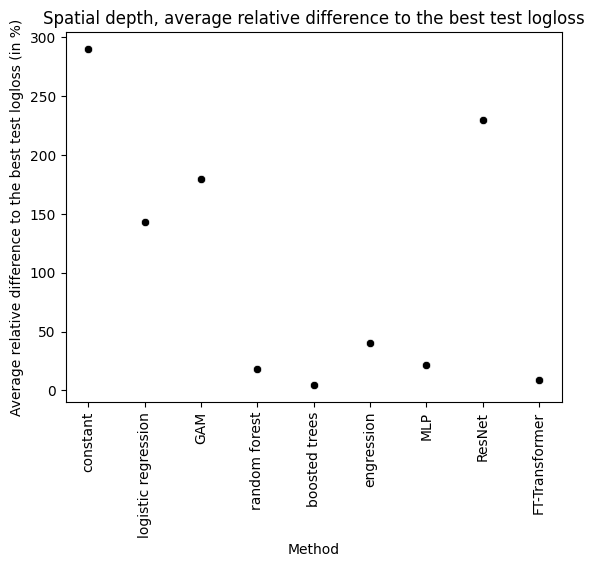

In [27]:
import os
import pandas as pd

directory = r'RESULTS2/SPATIAL_DEPTH'
df = pd.DataFrame()

for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        task_name = filename.split('_spatial_depth_RMSE')[0]
        filepath = os.path.join(directory, filename)
        table = pd.read_csv(filepath)
        logloss = table['Log Loss']
        lowest_logloss = table['Log Loss'].min()
        df[task_name] = (logloss - lowest_logloss) / lowest_logloss

df.index=table['Method']
df.index.name = 'Method'
mean = df.mean(axis=1)
median = df.median(axis=1)
std = df.std(axis=1)
result_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Standard Deviation': std})
result_df.index.name = 'Method'
result_df.reset_index(inplace=True)

# Reorder the methods
method_order = ['constant', 'logistic_regression', 'GAM', 'rf', 'boosted_trees', 'engression', 'MLP', 'ResNet', 'FTTrans']
result_df['Method'] = pd.Categorical(result_df['Method'], categories=method_order, ordered=True)

# Sort the dataframe by the reordered method column
result_df.sort_values('Method', inplace=True)

result_df['Method'] = result_df['Method'].replace({'rf': 'random forest', 'boosted_trees': 'boosted trees', 'logistic_regression': 'logistic regression', 'FTTrans': 'FT-Transformer'})
result_df['Mean'] = 100*result_df['Mean']

# Plot the scatterplot
sns.scatterplot(data=result_df, x='Method', y='Mean', color='black')

# Removing the ylabel
plt.ylabel('Average relative difference to the best test logloss (in %)')

# Adding labels and title
plt.xlabel('Method')
plt.title('Spatial depth, average relative difference to the best test logloss')

# Rotating x-axis labels vertically
plt.xticks(rotation='vertical')

# Save the plot
os.makedirs('PICTURES', exist_ok=True)
plt.savefig('PICTURES/spatial_depth_logloss_only_num_features_relative_differences.png')

plt.show()

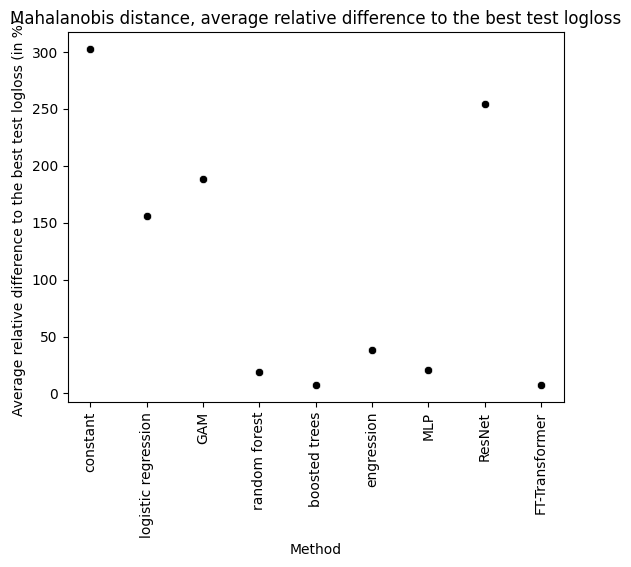

In [28]:
import os
import pandas as pd

directory = r'RESULTS2/MAHALANOBIS'
df = pd.DataFrame()

for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        task_name = filename.split('_mahalanobis_RMSE')[0]
        filepath = os.path.join(directory, filename)
        table = pd.read_csv(filepath)
        logloss = table['Log Loss']
        lowest_logloss = table['Log Loss'].min()
        df[task_name] = (logloss - lowest_logloss) / lowest_logloss

df.index=table['Method']
df.index.name = 'Method'
mean = df.mean(axis=1)
median = df.median(axis=1)
std = df.std(axis=1)
result_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Standard Deviation': std})
result_df.index.name = 'Method'
result_df.reset_index(inplace=True)

# Reorder the methods
method_order = ['constant', 'logistic_regression', 'GAM', 'rf', 'boosted_trees', 'engression', 'MLP', 'ResNet', 'FTTrans']
result_df['Method'] = pd.Categorical(result_df['Method'], categories=method_order, ordered=True)

# Sort the dataframe by the reordered method column
result_df.sort_values('Method', inplace=True)

result_df['Method'] = result_df['Method'].replace({'rf': 'random forest', 'boosted_trees': 'boosted trees', 'logistic_regression': 'logistic regression', 'FTTrans': 'FT-Transformer'})
result_df['Mean'] = 100*result_df['Mean']

# Plot the scatterplot
sns.scatterplot(data=result_df, x='Method', y='Mean', color='black')

# Removing the ylabel
plt.ylabel('Average relative difference to the best test logloss (in %)')

# Adding labels and title
plt.xlabel('Method')
plt.title('Mahalanobis distance, average relative difference to the best test logloss')

# Rotating x-axis labels vertically
plt.xticks(rotation='vertical')

# Save the plot
os.makedirs('PICTURES', exist_ok=True)
plt.savefig('PICTURES/mahalanobis_logloss_only_num_features_relative_differences.png')

plt.show()